In [33]:
import wandb
import pandas as pd

In [2]:
api = wandb.Api()

In [47]:
project_name = "wm-comp-limit-7.3.1"
sweep_id = "4rrckcd1"
runs = api.sweep(f"aloxatel/{project_name}/{sweep_id}").runs
dfs = []
for run in runs:
    metrics = run.history(pandas=True, samples=10_000)
    metrics["run_id"] = run.name
    metrics["sweep_id"] = sweep_id
    dfs += [metrics.groupby("epoch").first().reset_index()]

df = pd.concat(dfs).reset_index(drop=True)
df

,epoch,epoch_step,test_predictions,_timestamp,train_loss,cumAUC,test_acc,eval_macro_acc,eval_acc,eval_loss,...,test_macro_acc,step,_step,best_val_acc,best_val_epoch,cumAUC_normalized,_runtime,best_val_loss,run_id,sweep_id
0,0,0.0,None,1.762406e+09,6.079103,0.000000,0.794943,0.000,0.795847,0.422574,...,0.000,0.0,0,0.0,-1.0,NaN,10.471682,Infinity,zesty-sweep-9,4rrckcd1
1,1,0.0,None,1.762407e+09,0.114005,0.948410,0.947327,0.000,0.948187,0.116359,...,0.000,1563.0,1574,0.0,0.0,NaN,723.070967,0.116558,zesty-sweep-9,4rrckcd1
2,2,19.0,None,1.762408e+09,0.131316,1.923010,NaN,NaN,NaN,NaN,...,NaN,3144.0,3163,0.0,1.0,NaN,1421.028718,0.059872,zesty-sweep-9,4rrckcd1
3,3,1.0,None,1.762408e+09,0.061371,2.897317,0.986290,0.027,0.986923,0.032808,...,0.037,4689.0,4715,0.0,2.0,NaN,2104.389275,0.058335,zesty-sweep-9,4rrckcd1
4,4,9.0,None,1.762409e+09,0.043992,3.880110,NaN,NaN,NaN,NaN,...,NaN,6259.0,6293,0.0,3.0,NaN,2796.961929,0.040896,zesty-sweep-9,4rrckcd1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,55,11.0,None,1.762465e+09,0.002730,54.076793,NaN,NaN,NaN,NaN,...,NaN,42980.0,43407,0.0,53.0,None,65574.099826,0.002435,still-sweep-1,4rrckcd1
596,56,0.0,None,1.762466e+09,0.003855,55.075037,0.998187,0.578,0.998227,0.003304,...,0.613,43750.0,44185,0.0,53.0,None,66736.004101,0.002435,still-sweep-1,4rrckcd1
597,57,12.0,None,1.762467e+09,0.003017,56.073380,0.998107,0.605,0.998323,0.003267,...,0.609,44544.0,44986,0.0,53.0,None,67927.637523,0.002435,still-sweep-1,4rrckcd1
598,58,7.0,None,1.762469e+09,0.008042,57.070223,0.997393,0.482,0.997477,0.005845,...,0.518,45320.0,45770,0.0,53.0,None,69098.382439,0.002435,still-sweep-1,4rrckcd1


<Axes: xlabel='epoch', ylabel='eval_acc'>

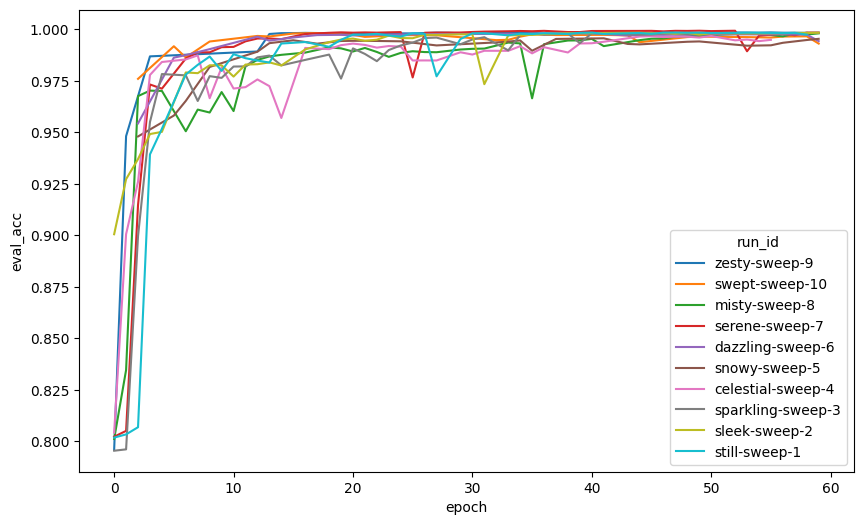

In [63]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(
    df,
    x="epoch",
    y="eval_acc",
    hue="run_id",
    linestyle="-",
    # edgecolor=None,
    ax=ax,
)